In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37976 entries, 0 to 37975
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bill Date                37976 non-null  object 
 1   Bill Time                37976 non-null  int64  
 2   Transaction Type         37976 non-null  int64  
 3   Salesman                 37976 non-null  int64  
 4   Sales Promo Code         37976 non-null  object 
 5   Sales Promo Description  37976 non-null  object 
 6   Stock No.                37976 non-null  float64
 7   Class Name               37976 non-null  int64  
 8   Style Code               37976 non-null  int64  
 9   Size Code                37976 non-null  int64  
 10  MRP                      37976 non-null  float64
 11  Quantity                 37976 non-null  int64  
 12  Value                    37976 non-null  float64
 13  Tax Percent              37976 non-null  float64
 14  SGST Value            

In [22]:
import pandas as pd

data=pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\\SALES PREDICTION PROJECT\\preprocessed_data.csv')




# Define the target variable
y = data['Value']

# Define the feature set (excluding 'Value' and any other non-predictive features)
X = data[['MRP', 'Quantity', 'Tax Percent', 'Class Name', 'Size Code', 'Transaction Type', 'SGST Value', 'CGST Value', 'Item Discount']]

# If there are categorical variables, you might need to encode them
X = pd.get_dummies(X, columns=['Class Name', 'Size Code', 'Transaction Type'], drop_first=True)



In [23]:
# Fill missing values with 0
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')



Mean Squared Error: 68010.16370365521
R^2 Score: 0.9488380556042012


Training R^2: 0.8974716388843065
Test R^2: 0.9488380556042012
Cross-Validation R^2 Scores: [0.95852052 0.74721111 0.93171446 0.9314169  0.94541709]
Mean CV R^2 Score: 0.9028560154129466


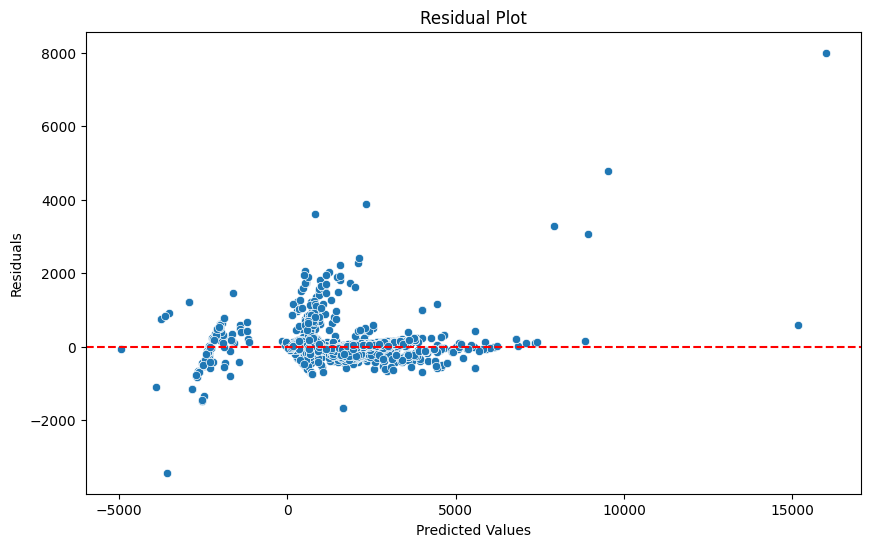

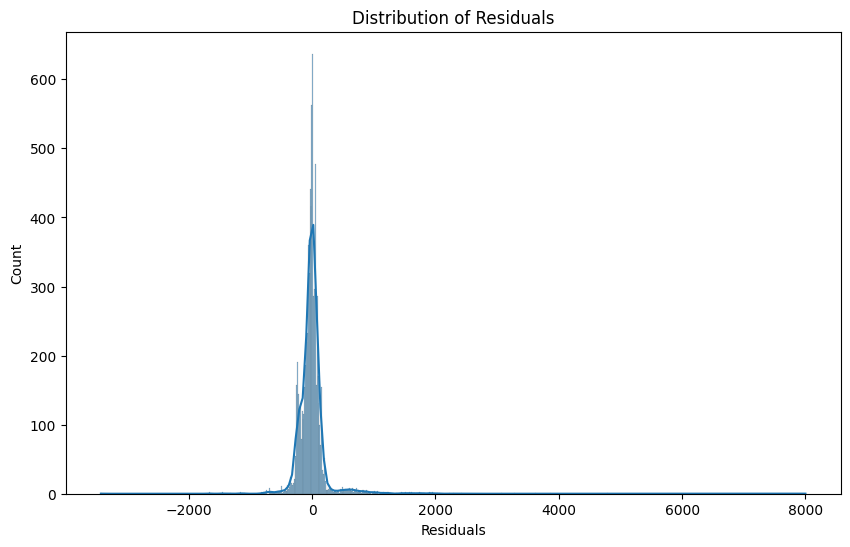

In [25]:

# Compare training and test R^2 values to check for overfitting
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print(f'Training R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Mean CV R^2 Score: {np.mean(cv_scores)}')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

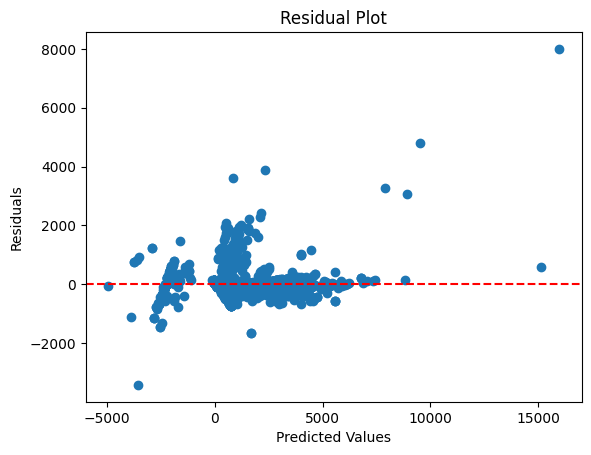

Outliers:
[  56   74  271  358  423  425  586  594  791  799  877 1004 1054 1065
 1136 1166 1190 1243 1328 1351 1629 1639 1743 1826 1865 1884 1897 2035
 2139 2194 2299 2323 2346 2395 2424 2527 2554 2580 2633 2647 2661 2695
 2802 2809 2923 2989 2996 3049 3100 3149 3186 3196 3317 3386 3417 3648
 3657 3840 3970 4032 4061 4178 4185 4207 4246 4299 4462 4563 4596 4634
 4636 4714 4752 4854 5013 5105 5282 5298 5360 5496 5507 5509 5546 5576
 5579 5583 5622 5651 5674 5726 5773 5814 6051 6181 6265 6273 6438 6456
 6600 6711 6769 6796 6898 6933 6993 7000 7029 7038 7051 7079 7135 7152
 7155 7197 7227 7239 7323 7325 7391 7406 7413 7513 7522 7525]
Number of outliers: 124


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Identify outliers
threshold = np.mean(residuals) + 3 * np.std(residuals)
outliers = np.where(np.abs(residuals) > threshold)[0]

print("Outliers:")
print(outliers)
print("Number of outliers:", len(outliers))

Lasso Regression:


c:\Users\USER\anaconda1\envs\SALES_PREDICTION_AS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.500e+06, tolerance: 4.159e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda1\envs\SALES_PREDICTION_AS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.692e+09, tolerance: 4.112e+06
  model = cd_fast.enet_coordinate_descent(


Training R^2: 0.8963602702082686
Test R^2: 0.9489238742982485
Mean Squared Error: 67896.08392228796
Cross-Validation R^2 Scores: [0.96246404 0.7465498  0.93391879 0.92802361 0.94581855]
Mean CV R^2 Score: 0.9033549583473748


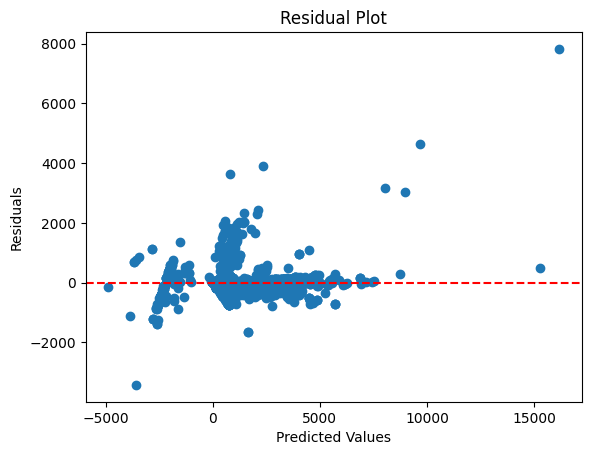

Ridge Regression:
Training R^2: 0.897440148928376
Test R^2: 0.9489079264254755
Mean Squared Error: 67917.28361379365
Cross-Validation R^2 Scores: [0.95987038 0.74744775 0.93200056 0.93134479 0.94553237]
Mean CV R^2 Score: 0.9032391683473117


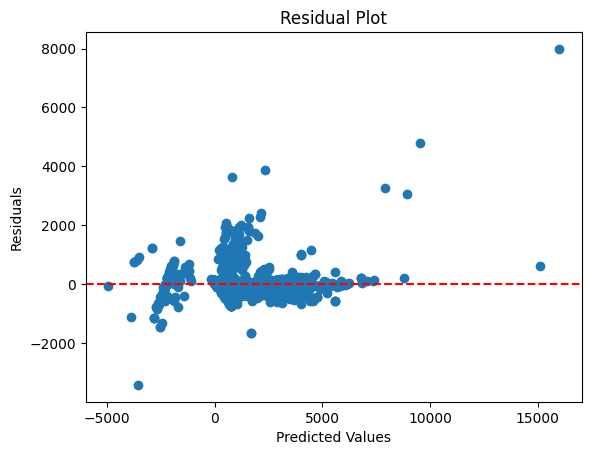

In [27]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

# Lasso regression
lasso = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

# Ridge regression
ridge = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

# Evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    training_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_cv_r2 = np.mean(cv_scores)
    
    print(f"Training R^2: {training_r2}")
    print(f"Test R^2: {test_r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Cross-Validation R^2 Scores: {cv_scores}")
    print(f"Mean CV R^2 Score: {mean_cv_r2}")
    
    # Residual plot
    residuals = y_test - y_test_pred
    plt.scatter(y_test_pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

print("Lasso Regression:")
evaluate_model(lasso, X_train, y_train, X_test, y_test)

print("Ridge Regression:")
evaluate_model(ridge, X_train, y_train, X_test, y_test)


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model
ridge = Ridge()

# Define the parameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Perform grid search
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameter
print("Best alpha:", grid_search.best_params_)

Best alpha: {'alpha': 1.0}


In [29]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean CV R^2 Score:", cv_scores.mean())


Cross-Validation R^2 Scores: [0.88874164 0.94629098 0.79842508 0.92844792 0.92225605]
Mean CV R^2 Score: 0.896832332306958


In [30]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.feature_selection import RFE

# Define the model
ridge = Ridge(alpha=grid_search.best_params_['alpha'])

# Perform RFE
selector = RFE(ridge, n_features_to_select=10)
selector.fit(X_train_scaled, y_train)

# Selected features
print("Selected Features:", selector.support_)

Selected Features: [ True  True  True  True  True  True False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False  True]


In [32]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'sales_prediction_model.pkl')

['sales_prediction_model.pkl']